In [1]:
import sys
import numpy as np
import astropy.constants as const
import astropy.units as u

In [2]:
freq=[1.5*10**9,3*10**9]*u.Hz
lambd=(const.c/freq).to(u.cm)
ksc = 1
DSC = 100*u.cm
GSC = 4*(np.pi**2)*(DSC**2)*ksc/lambd**2
lambd,GSC

(<Quantity [19.98616387,  9.99308193] cm>,
 <Quantity [ 988.32743011, 3953.30972044]>)

In [3]:
# SGL
delta_nu=2.7939677238464355*u.Hz
SNR=10
obs_time=300*u.s

# Hippke
G = 10**5
distance = [550,1000]*u.AU
# distance = 1000*u.pc
# Enriquez 2017

Tsys = 20*u.K
A = np.pi*(50*u.m)**2
eta = 0.72
A_eff = eta * A
SEFD = 2 * const.k_B * Tsys / A_eff
SEFD_L = 10*u.Jy
SEFD_S = 12*u.Jy

# delta_nu = 3*u.Hz
n_pol=2
Flux_L = SNR * SEFD_L * np.sqrt(delta_nu/n_pol/obs_time)

# Sheikh ETZ
# SEFD = Tsys/G
delta_nu = 2.7*u.Hz
Flux_density_L = SNR * SEFD_L * np.sqrt(delta_nu/obs_time/np.sqrt(2))
Flux_density_S = SNR * SEFD_S * np.sqrt(delta_nu/obs_time/np.sqrt(2))
for d in distance:
    EIRP_L = (4*np.pi*d**2 * Flux_density_L).to(u.W)
    EIRP_S = (4*np.pi*d**2 * Flux_density_S).to(u.W)
    print(f'Distance: {d}')
    print(f'EIRP in L-band: {EIRP_L}\nEIRP in S-band: {EIRP_S}')
    print(f'Directed Transmitter in L-band: {EIRP_L/GSC[0]}\nDirected Transmitter in S-band: {EIRP_S/GSC[1]}')

Distance: 550.0 AU
EIRP in L-band: 6786.562029285125 W
EIRP in S-band: 8143.874435142152 W
Directed Transmitter in L-band: 6.8667142310693565 W
Directed Transmitter in S-band: 2.0600142693208072 W
Distance: 1000.0 AU
EIRP in L-band: 22434.915799289673 W
EIRP in S-band: 26921.898959147606 W
Directed Transmitter in L-band: 22.699881755601183 W
Directed Transmitter in S-band: 6.809964526680354 W


In [4]:
EIRP_L/GSC

<Quantity [22.69988176,  5.67497044] W>

In [5]:
import os
import glob
from blimpy import Waterfall
os.chdir('/gpfs/group/jtw13/default/gbt_2020/2021/L_band/splice_no_overlap_ordered')
h5s = sorted(glob.glob('*.h5'))

In [6]:
SNR = 15.149476
f_mid=1191.797502
# f_mid=2465.993508
# f_mid=4124.999750
f_delta = 0.000207
# f_delta = 0.000010
f_start = f_mid - f_delta
f_stop  = f_mid + f_delta
wf=Waterfall(h5s[0],f_start=f_start,f_stop=f_stop)
plot_f,plot_data=wf.grab_data(f_start=f_start,f_stop=f_stop)

In [7]:
np.shape(plot_data)
(f_stop-f_start)/149

2.7785234905477775e-06

In [8]:
sum(plot_data[0][:50])/50,sum(plot_data[0][50:100])/50,sum(plot_data[0][100:148])/48

(997287.39125, 1040451.875, 1027048.7096354166)

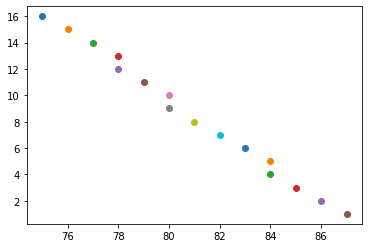

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(16):
    # print(plot_data[i][72:78])
    y=16-i
    x=np.argmax(plot_data[i])
    plt.scatter(x,y)
    # plt.xlim(0,148)
plt.show()

In [10]:
(207+206)/148

2.7905405405405403

In [11]:
signal=0
noise=0
for i in range(16):
    noise+=plot_data[i][np.argmax(plot_data[i])-25]
    signal+=plot_data[i].max()
signal/=16
noise/=16
print(f'signal: {signal}')
print(f'noise: {noise}')
print(f'SNR: {signal/noise}')

signal: 2710959.578125
noise: 991830.87890625
SNR: 2.733288139924151


In [12]:
print(f'Reported SNR: {SNR}')
np.log((signal/np.sqrt(noise))**2)

Reported SNR: 15.149476


15.818318549341887

In [13]:
import gc
del wf
gc.collect()

4266

In [14]:
SNR = 385.369446
f_mid=2250.900443
f_delta = 0.000207
f_start = f_mid - f_delta
f_stop  = f_mid + f_delta
wf=Waterfall(h5s[0],f_start=f_start,f_stop=f_stop)
plot_f,plot_data=wf.grab_data(f_start=f_start,f_stop=f_stop)

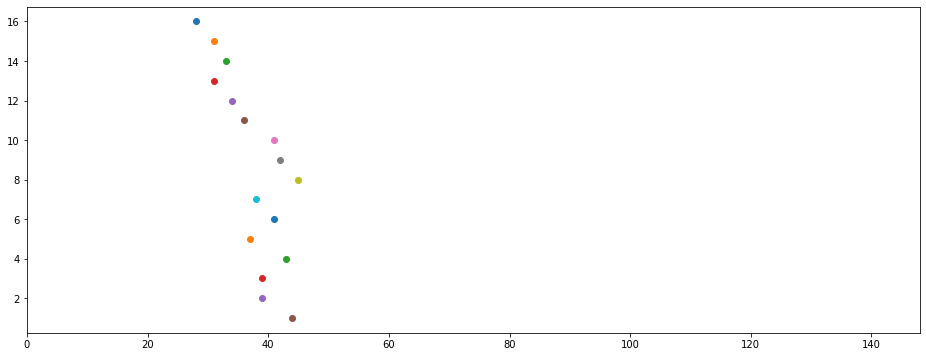

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(16,6))
for i in range(16):
    # print(plot_data[i][72:78])
    y=16-i
    x=np.argmax(plot_data[i])
    plt.scatter(x,y)
    plt.xlim(0,148)
plt.show()

In [16]:
signal=0
noise=0
for i in range(16):
    noise+=plot_data[i][np.argmax(plot_data[i])+50]
    signal+=plot_data[i].max()
signal/=16
noise/=16
print(f'signal: {signal}')
print(f'noise: {noise}')
print(f'SNR: {signal/noise}')

print(f'Reported SNR: {SNR}')
np.log((signal/np.sqrt(noise))**2)

signal: 464626.5234375
noise: 7847.4847412109375
SNR: 59.20706299657028
Reported SNR: 385.369446


17.130030028595993

In [17]:
Tsys = 20*u.K
eta=0.72
A=np.pi*(50*u.m)**2
A_eff = eta*A
SEFD = 2* const.k_B*Tsys/A_eff
SEFD.to(u.Jy)

<Quantity 9.76609391 Jy>

In [18]:
16*18.25

292.0

In [23]:
np.shape(plot_data), np.shape(plot_f), plot_f, plot_data

((16, 148),
 (148,),
 array([2250.90064947, 2250.90064667, 2250.90064388, 2250.90064108,
        2250.90063829, 2250.9006355 , 2250.9006327 , 2250.90062991,
        2250.90062711, 2250.90062432, 2250.90062153, 2250.90061873,
        2250.90061594, 2250.90061314, 2250.90061035, 2250.90060756,
        2250.90060476, 2250.90060197, 2250.90059917, 2250.90059638,
        2250.90059359, 2250.90059079, 2250.900588  , 2250.9005852 ,
        2250.90058241, 2250.90057962, 2250.90057682, 2250.90057403,
        2250.90057123, 2250.90056844, 2250.90056565, 2250.90056285,
        2250.90056006, 2250.90055726, 2250.90055447, 2250.90055168,
        2250.90054888, 2250.90054609, 2250.90054329, 2250.9005405 ,
        2250.90053771, 2250.90053491, 2250.90053212, 2250.90052933,
        2250.90052653, 2250.90052374, 2250.90052094, 2250.90051815,
        2250.90051536, 2250.90051256, 2250.90050977, 2250.90050697,
        2250.90050418, 2250.90050139, 2250.90049859, 2250.9004958 ,
        2250.900493  , 2250

In [28]:
(f_stop-f_start)/149,(0.041927e-3+0.041927e-3)/149

(2.7785234905477775e-06, 5.627785234899329e-07)